In [2]:
import pandas as pd
from scipy.stats import linregress
# import plt
import matplotlib.pyplot as plt
import numpy as np

def generalized_linear_regression(X, Y, dY):
    """
    Generalized (weighted) linear regression with intercept.

    Model:
        Y = beta0 + beta1 * X + eps
        Cov(eps) = sigma^2 * D, where D = diag(dY^2)
    """

    X = np.asarray(X)
    Y = np.asarray(Y)
    dY = np.asarray(dY)
    n = len(Y)

    # Design matrix with intercept
    A = np.vstack([np.ones_like(X), X]).T  # n x 2

    # D^{-1} = diag(1 / dY^2)
    W = np.diag(1.0 / dY**2)

    # beta_hat = (A^T W A)^(-1) A^T W Y
    cov_beta = np.linalg.inv(A.T @ W @ A)
    beta_hat = cov_beta @ (A.T @ W @ Y)
    beta0, beta1 = beta_hat

    # residuals
    residuals = Y - A @ beta_hat

    # sigma^2_hat
    p = 2
    sigma2_hat = (residuals.T @ W @ residuals) / (n - p)

    # standard errors
    sde = np.sqrt(np.diag(cov_beta) * sigma2_hat)
    sde_beta0, sde_beta1 = sde

    # R^2 (weighted)
    Y_mean = np.average(Y, weights=1/dY**2)
    ss_tot = np.sum(((Y - Y_mean)**2) / dY**2)
    ss_res = np.sum((residuals**2) / dY**2)
    R2 = 1 - ss_res / ss_tot

    # Reduced chi^2
    chi2_red = ss_res / (n - p)

    # plotting
    plt.figure()
    plt.errorbar(X, Y, yerr=dY, fmt='o', label='data')
    xfit = np.linspace(np.min(X), np.max(X), 200)
    yfit = beta0 + beta1 * xfit
    plt.plot(xfit, yfit, 'r-', label='fit')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Weighted Linear Fit')
    plt.show()

    # Prediction function with uncertainty
    def predict(x_new):
        x_new = np.asarray(x_new)
        A_new = np.vstack([np.ones_like(x_new), x_new]).T
        y_pred = A_new @ beta_hat
        # prediction variance = sigma^2 * A_new (A^T W A)^(-1) A_new^T
        pred_var = sigma2_hat * np.sum(A_new @ cov_beta * A_new, axis=1)
        pred_err = np.sqrt(pred_var)
        return y_pred, pred_err

    return {
        "beta0": beta0,
        "beta1": beta1,
        "sde_beta0": sde_beta0,
        "sde_beta1": sde_beta1,
        "sigma2_hat": sigma2_hat,
        "R2": R2,
        "chi2_red": chi2_red,
        "predict": predict
    }

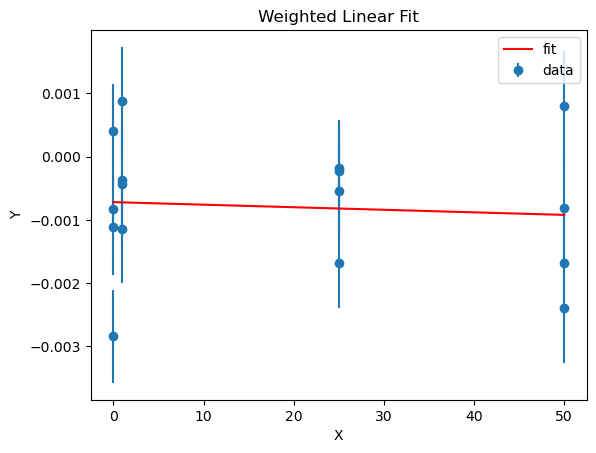

In [3]:
df = pd.read_csv(r"C:\ACME_analysis\multiple_results\sequencedf_result\0015.0752_0015.0753_0015.0754_0015.0755.csv")
x = df['V_offset']
y = df['omega_NE']
dy = df['uncertainty_omega_NE']
res = generalized_linear_regression(x, y, dy)

In [4]:
res

{'beta0': -0.0007196527562116439,
 'beta1': -4.034595009010164e-06,
 'sde_beta0': 0.00036241565521022515,
 'sde_beta1': 1.36818596671591e-05,
 'sigma2_hat': 1.7916127419550736,
 'R2': 0.006172945040689881,
 'chi2_red': 1.7916127419550736,
 'predict': <function __main__.generalized_linear_regression.<locals>.predict(x_new)>}